In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import math
%matplotlib inline

In [71]:
# Сгенерируем выборки
N = 20
X05 = sps.bernoulli.rvs(0.5, size=20)
X01 = sps.bernoulli.rvs(0.1, size=20)
X09 = sps.bernoulli.rvs(0.9, size=20)

Оценка максимального правдоподобия для $Bern(p)$: $\overline X$

Сопряженное априорное распределение для $Bern(p)$: $Beta(\alpha, \beta)$

Соответственно Байесовская оценка: $E(p|X) = \frac{\alpha + \sum_{x \in X}{x}}{\alpha + \beta + N}$

In [72]:
# Функции оценок
def likehoodEstimation(X):
    return np.mean(X)

def bayesEstimation(X, a, b):
    return (a + np.sum(X)) / (a + b + len(X))

# Для префиксов выборки посчитаем отклонение оценки от реального значения
def fillEstimation(X, expected, estimation):
    result = np.zeros(len(X))
    for n in range(1, len(X) + 1):
        result[n - 1] = abs(estimation(X[:n]) - expected)
    return result

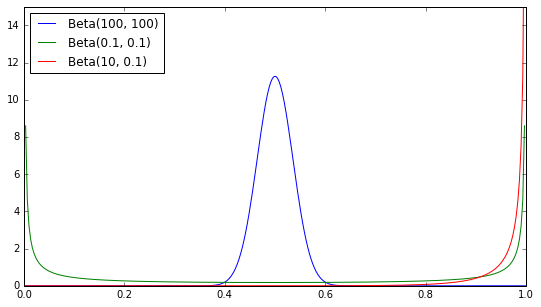

In [73]:
# Построим графики распределений оценок
grid = np.linspace(0, 1, 300)
plt.figure(figsize=(9, 5))
plt.plot(grid, sps.beta(100, 100).pdf(grid), label='Beta(100, 100)')
plt.plot(grid, sps.beta(0.1, 0.1).pdf(grid), label='Beta(0.1, 0.1)')
plt.plot(grid, sps.beta(10, 0.1).pdf(grid), label='Beta(10, 0.1)')
plt.legend(loc='best')
plt.ylim((0, 15))
plt.show()

Beta(100, 100) - монета честна

Beta(0.1, 0.1) - монета нечестная

Beta(10, 0.1) - монета скорее нечестная, перевес в сторону герба

In [74]:
params = [[100.0, 100.0], [0.1, 0.1], [10.0, 0.1]]

In [75]:
# Построение графиков
def showGraph(X, params, expected, scale):
    x = np.arange(1, len(X) + 1)

    plt.figure(figsize=(9, 5))
    plt.title('p =' + str(expected))
    plt.plot(x, fillEstimation(X, expected, likehoodEstimation), label='Likehood')
    for param in params:
        y = fillEstimation(X, expected, lambda X: bayesEstimation(X, param[0], param[1]))
        plt.plot(x, y, \
                 label='Bayes with $\\alpha =' + str(param[0]) + ', \\beta = ' + str(param[1]) + '$')

    plt.legend(loc='best')
    plt.ylim((0, scale))
    plt.xlabel('n')
    plt.ylabel('$|p - estimation|$')
    plt.show()

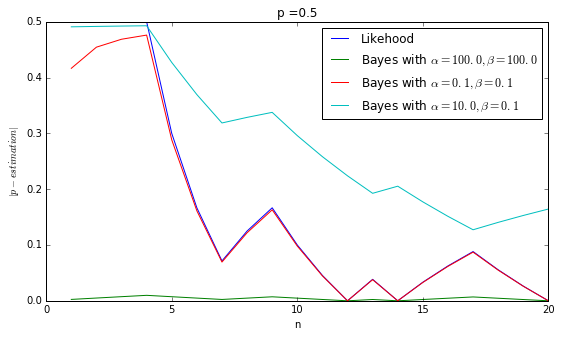

In [76]:
showGraph(X05, params, 0.5, 0.5)

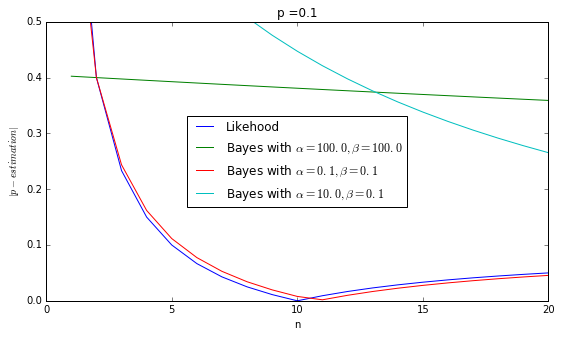

In [77]:
showGraph(X01, params, 0.1, 0.5)

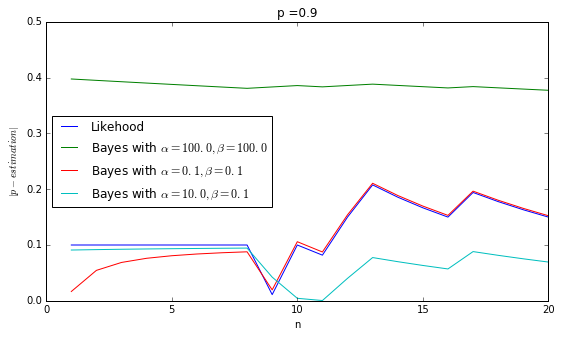

In [78]:
showGraph(X09, params, 0.9, 0.5)

Как и ожидалось:

Для p = 0.5, лучшей оценкой оказалась Байесовская оценка для честной монеты

Для p = 0.1 лучшей оценкой оказалась Байесовская оценка для нечестной монеты и оценка методом максимального правдоподобия (и вообще, на всех графиках они очень близки)

Для p = 0.9 лучшей оценкой оказалась Байесовская оценка для нечестной монеты c перевесом в сторону герба